# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [ ]:
df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Data Analysing and Visualisation

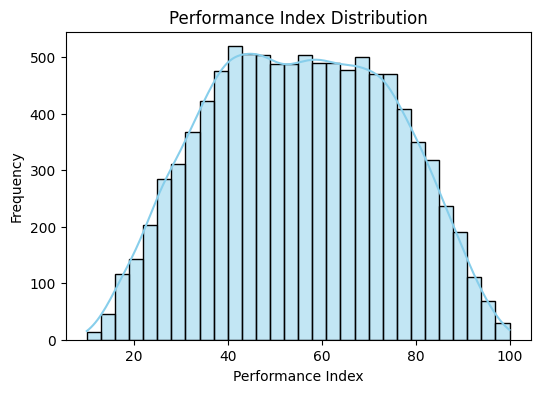

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Performance Index'], kde=True, bins=30, color='skyblue')
plt.title('Performance Index Distribution')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

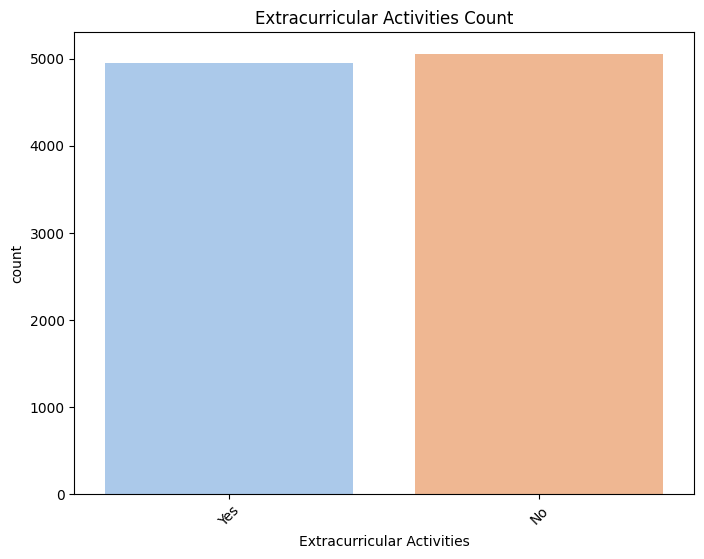

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Extracurricular Activities', palette='pastel')
plt.title('Extracurricular Activities Count')
plt.xticks(rotation=45)
plt.show()

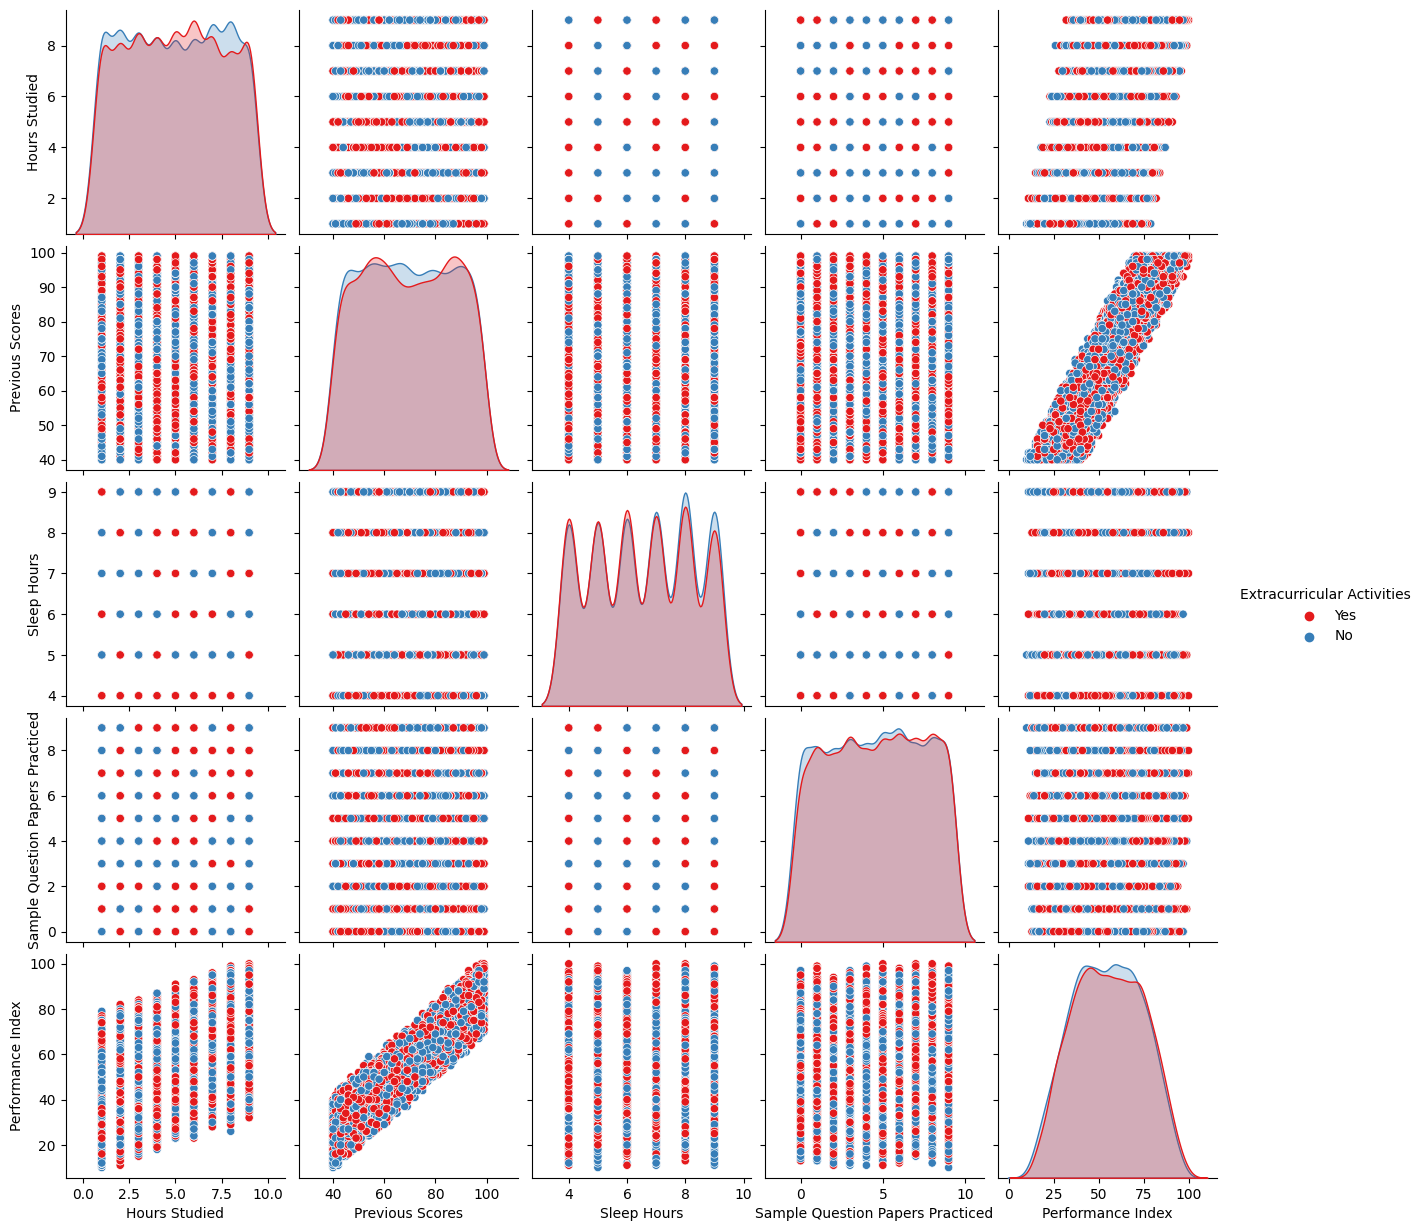

In [ ]:
sns.pairplot(df, hue='Extracurricular Activities', palette='Set1')
plt.show()

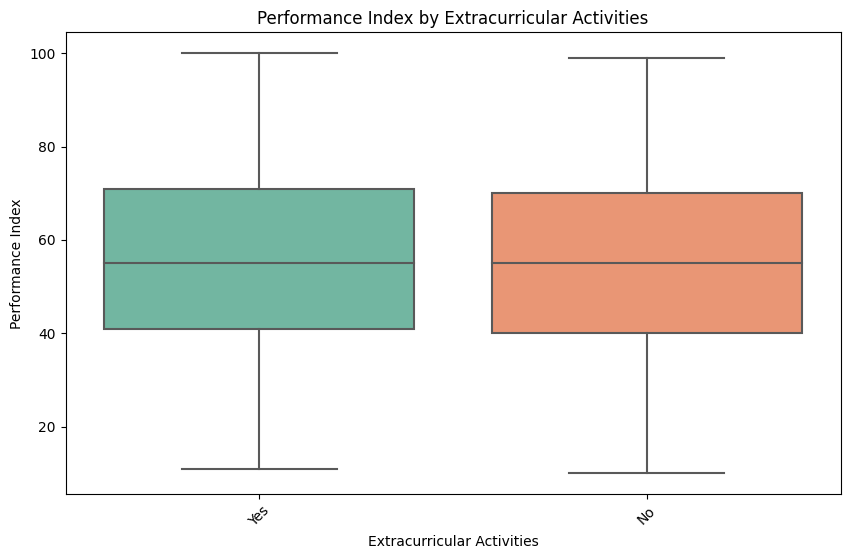

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Extracurricular Activities', y='Performance Index', palette='Set2')
plt.title('Performance Index by Extracurricular Activities')
plt.xticks(rotation=45)
plt.show()

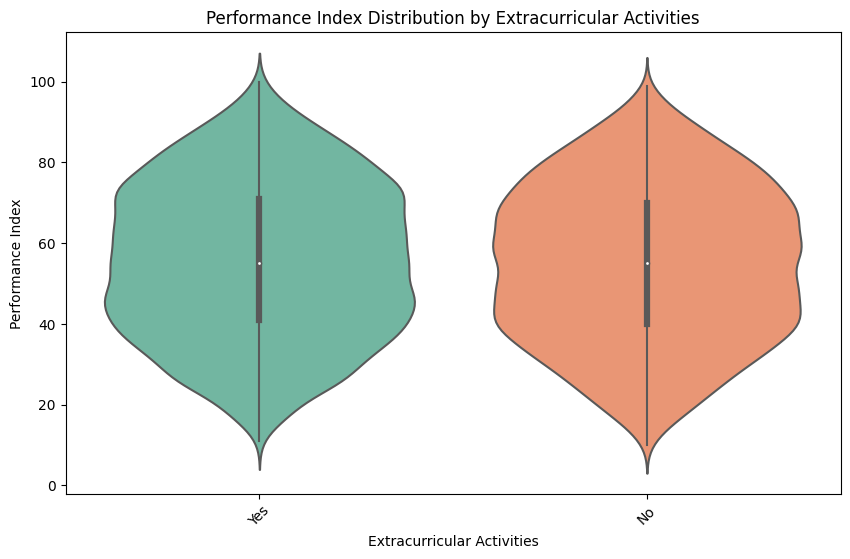

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Extracurricular Activities', y='Performance Index', palette='Set2')
plt.title('Performance Index Distribution by Extracurricular Activities')
plt.xticks(rotation=45)
plt.show()

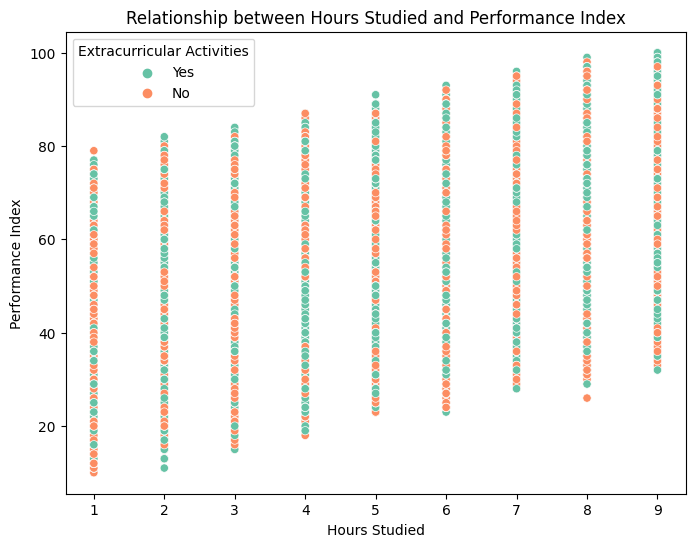

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities', palette='Set2')
plt.title('Relationship between Hours Studied and Performance Index')
plt.show()

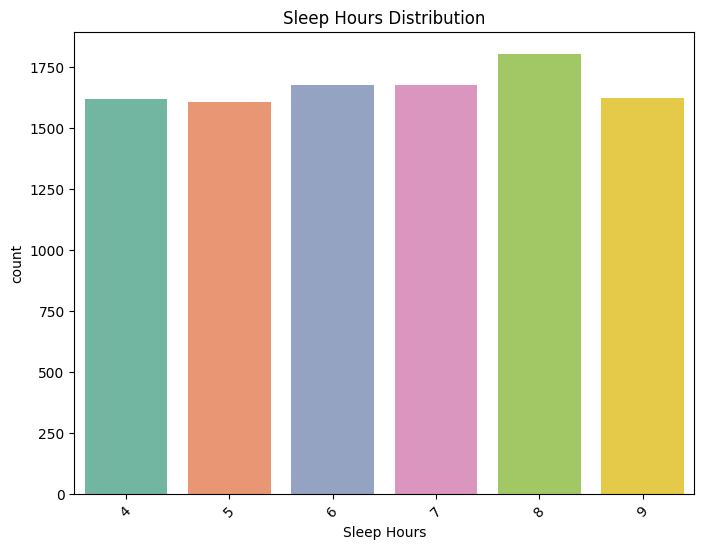

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep Hours', palette='Set2')
plt.title('Sleep Hours Distribution')
plt.xticks(rotation=45)
plt.show()

# Label Encoding

In [ ]:
df = pd.get_dummies(df,columns=['Extracurricular Activities'])

# Understanding Correlation

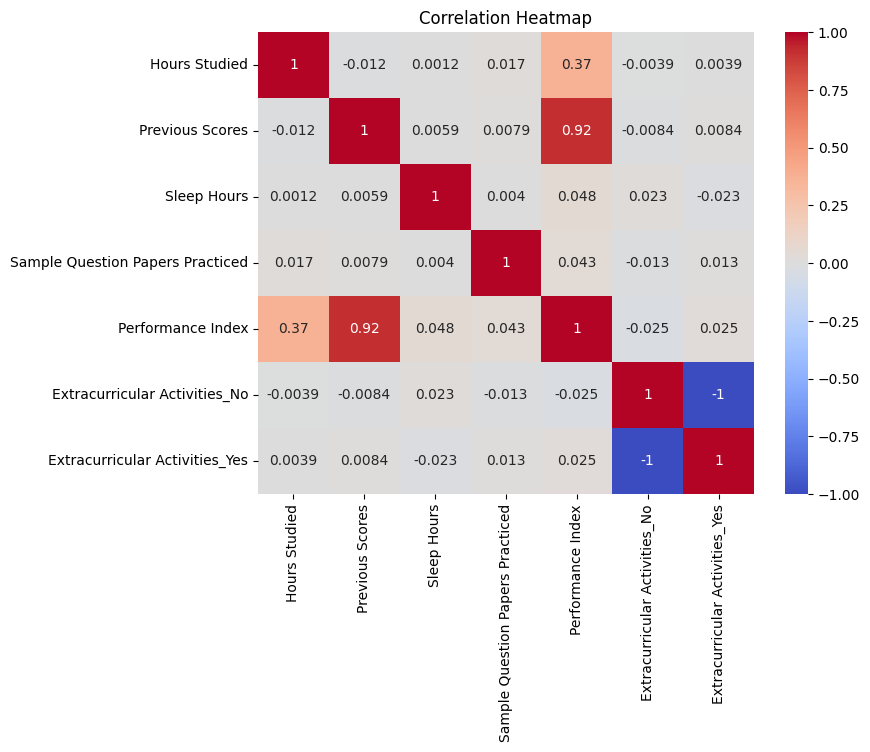

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_No     10000 non-null  bool   
 6   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 410.3 KB


# Dividing Target and Features

In [ ]:
X = df.drop(['Performance Index'],axis=1)
Y = df['Performance Index']

# Using Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 100)

# Type Casting

In [ ]:
X_train = X_train.astype('int64')
X_test = X_test.astype('int64')

# Feature Scaling

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Model Building (ML)

In [ ]:
Model = {
 'Random Forest Regressor' : RandomForestRegressor(),
 'Gradient Boost Regressor' : GradientBoostingRegressor(),
 'XGBoost' : xg.XGBRegressor(),
 'XGRF Regressor' : xg.XGBRFRegressor(),
 'Support Vector regressor' : SVR(),
 'Lasso Reg' : Lasso(),
 'Ridge Reg' : Ridge(),
 'Linear Regression' : LinearRegression(),
 'Extra Trees Regressor' : ExtraTreesRegressor()
}

# Testing and Prediction

In [ ]:
pred ={}
for name, Model in Model.items():
    Model.fit(X_train_scaled, Y_train)
    y_pred = Model.predict(X_test_scaled)
    pred[name]=y_pred

for Random Forest Regressor : 
Mean Square Error : 6.36691438076666
Mean Absolute Error : 2.0111279227994228
R2 Score : 0.9828210883215924


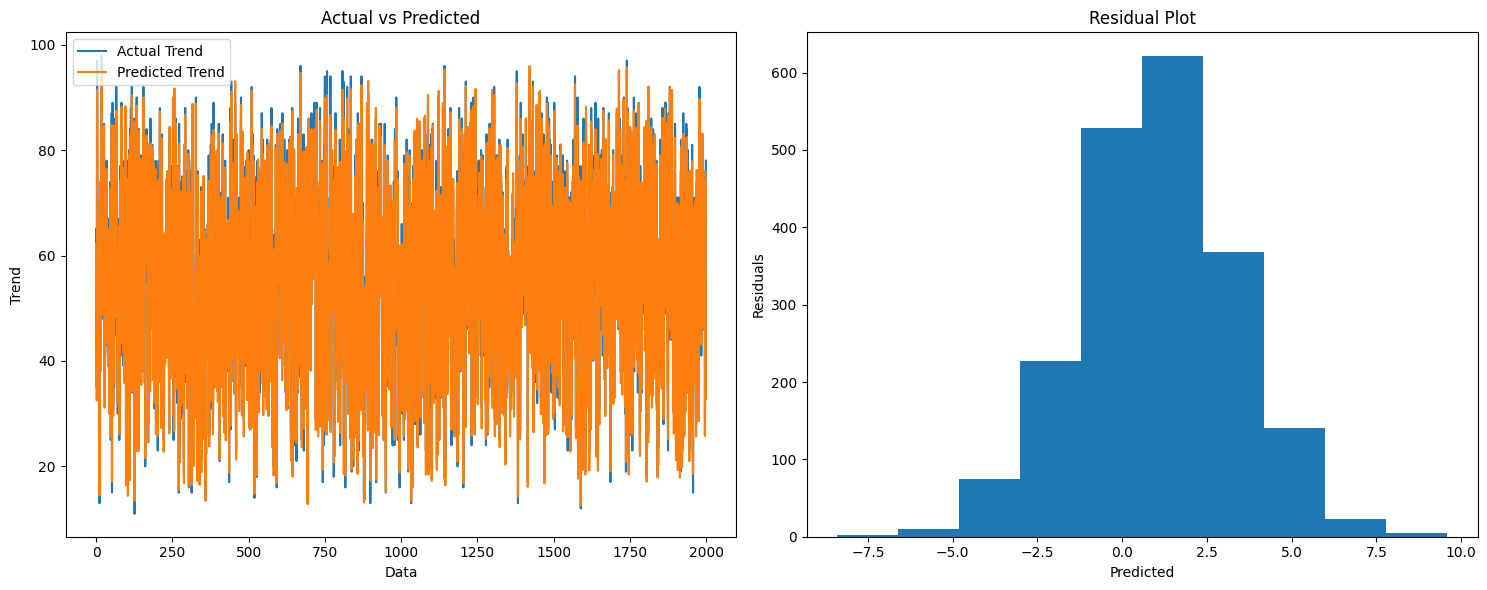

for Gradient Boost Regressor : 
Mean Square Error : 5.526802777150071
Mean Absolute Error : 1.8662995139530145
R2 Score : 0.9850878383005354


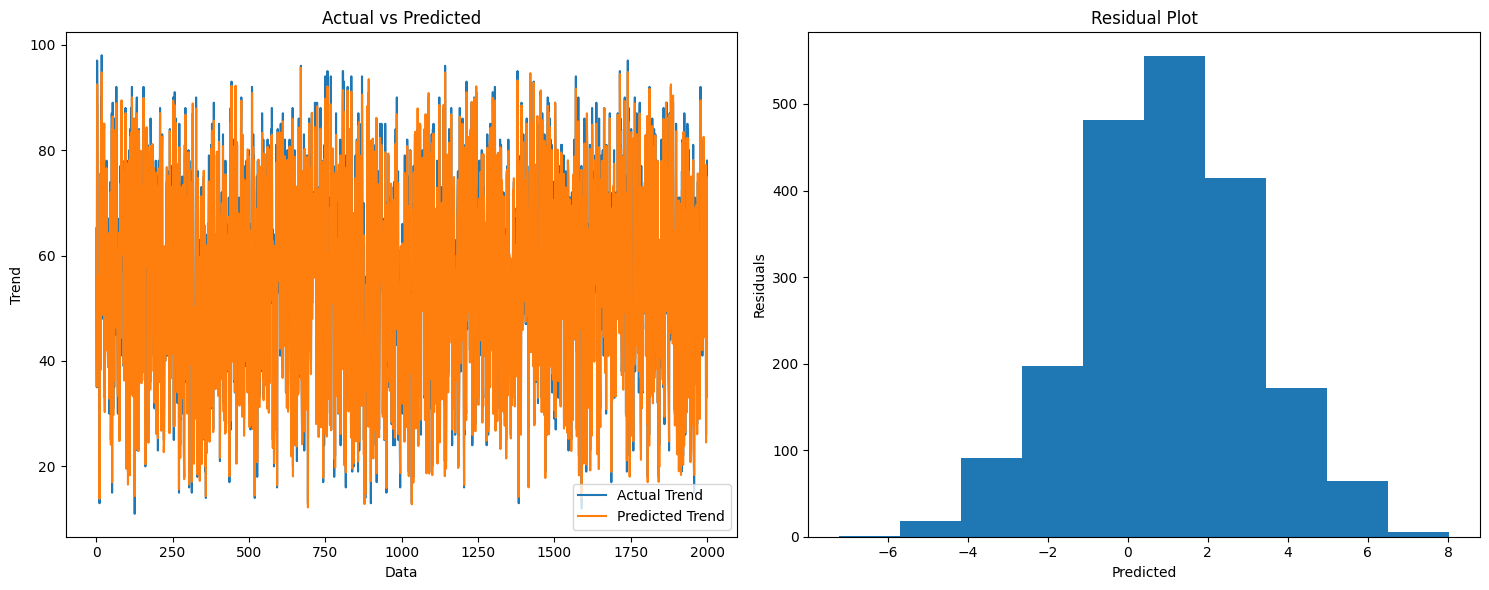

for XGBoost : 
Mean Square Error : 5.89266038948743
Mean Absolute Error : 1.9332247014045716
R2 Score : 0.9841006983402114


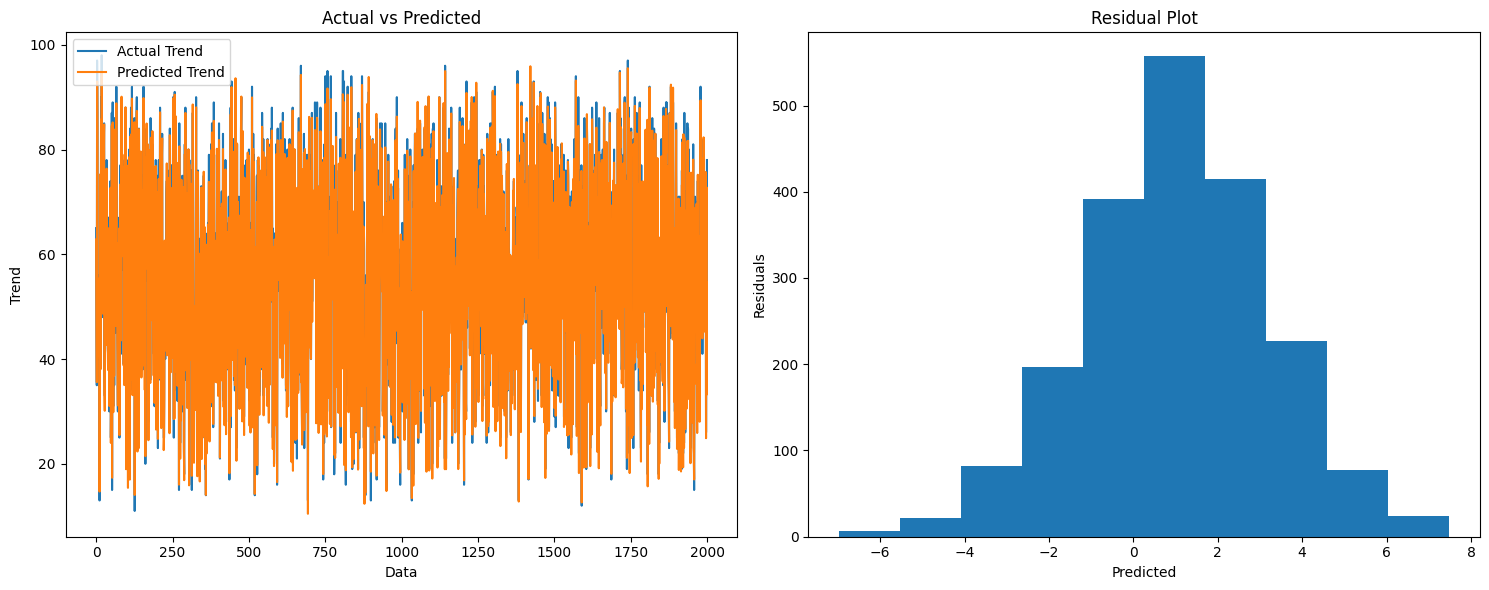

for XGRF Regressor : 
Mean Square Error : 8.389586584791026
Mean Absolute Error : 2.3092996969223023
R2 Score : 0.9773636084389871


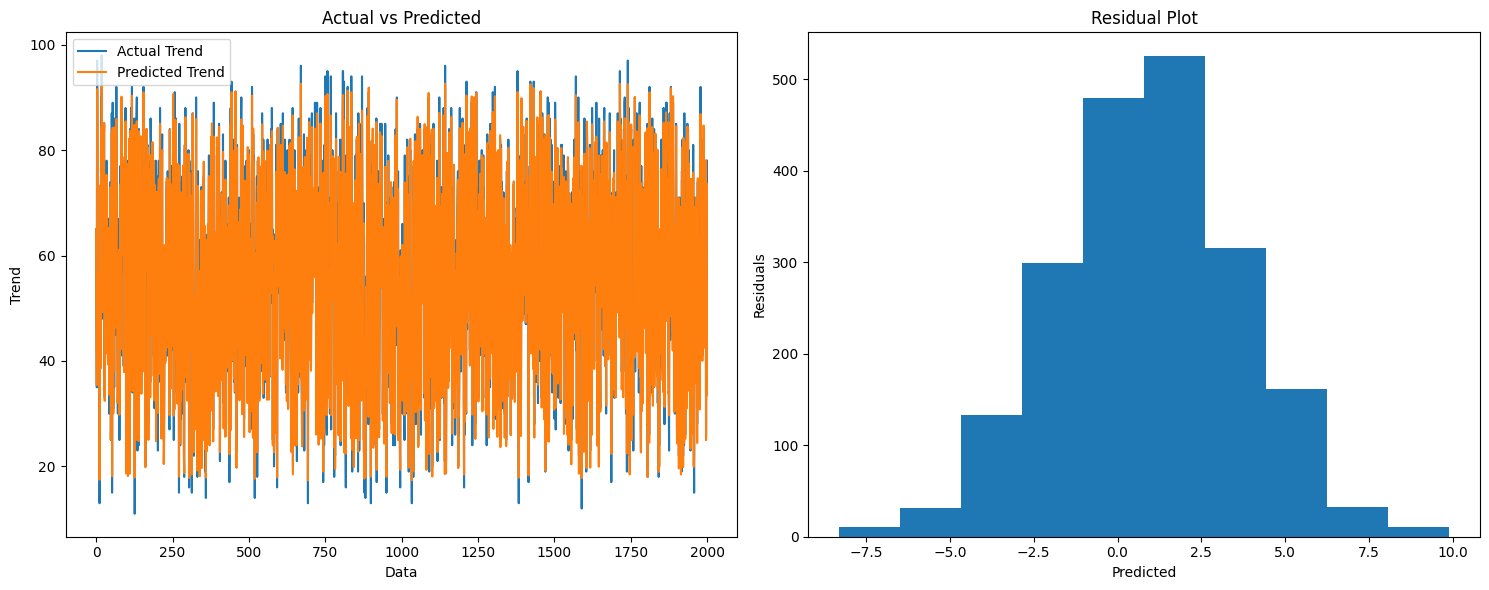

for Support Vector regressor : 
Mean Square Error : 6.198830897529737
Mean Absolute Error : 1.9731699856311755
R2 Score : 0.983274603343225


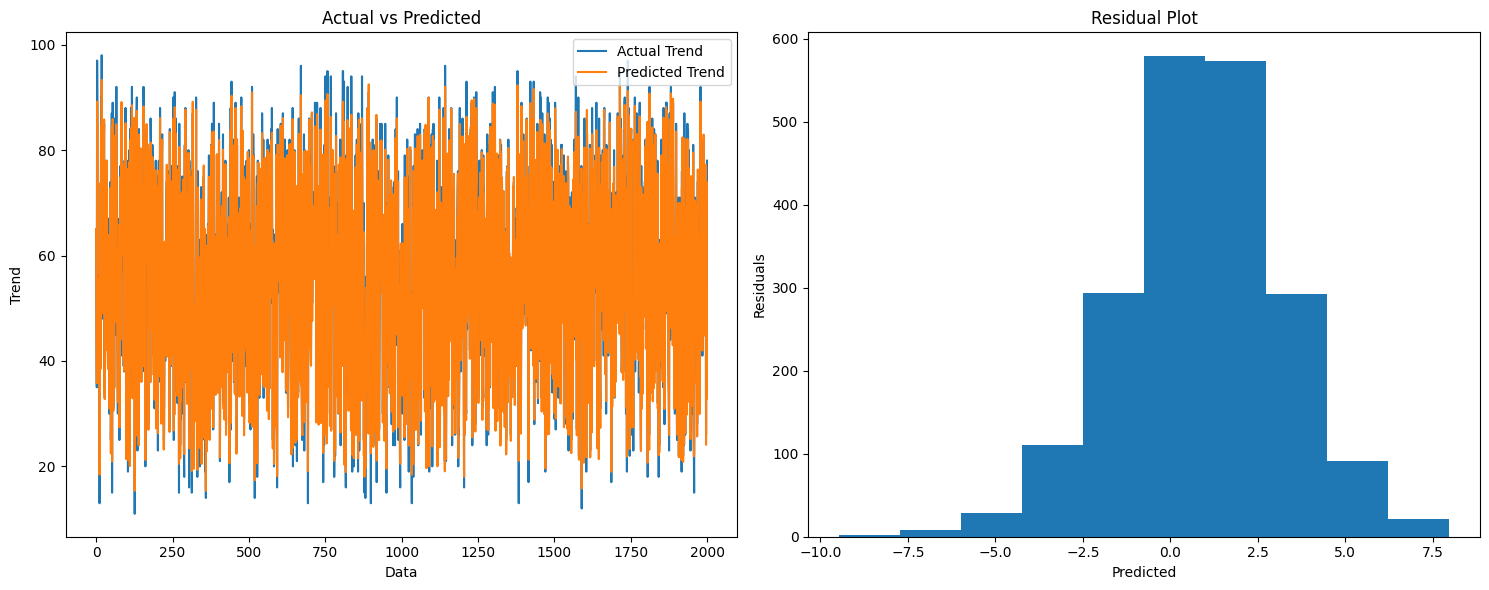

for Lasso Reg : 
Mean Square Error : 8.881127877022271
Mean Absolute Error : 2.3908365833186966
R2 Score : 0.9760373546305428


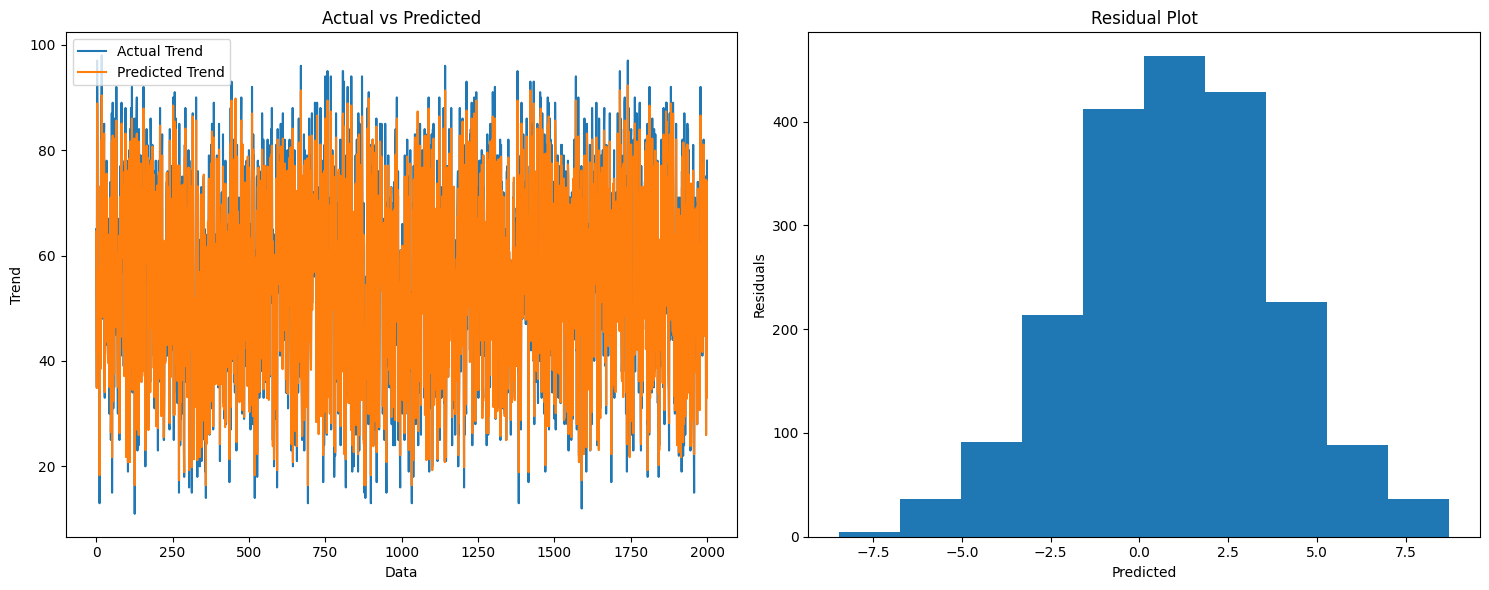

for Ridge Reg : 
Mean Square Error : 5.253900620792362
Mean Absolute Error : 1.8355405577128014
R2 Score : 0.9858241701813407


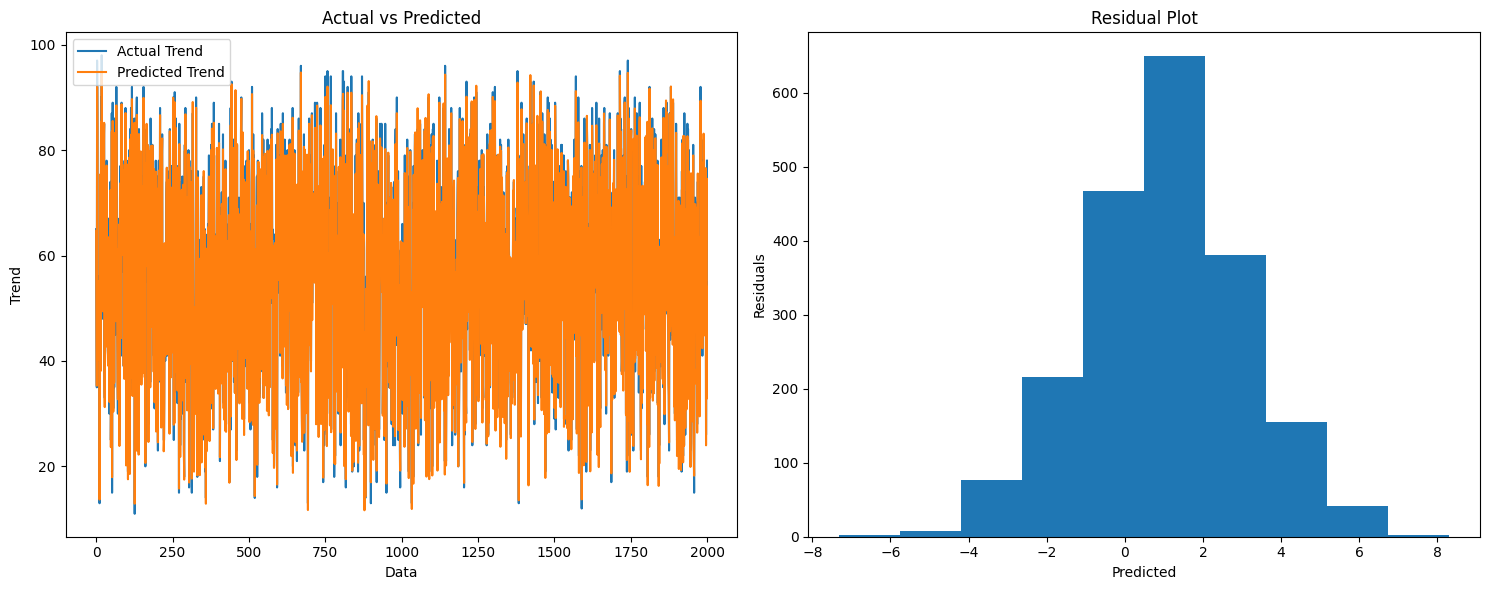

for Linear Regression : 
Mean Square Error : 5.2531224393281475
Mean Absolute Error : 1.83533911150934
R2 Score : 0.9858262698343034


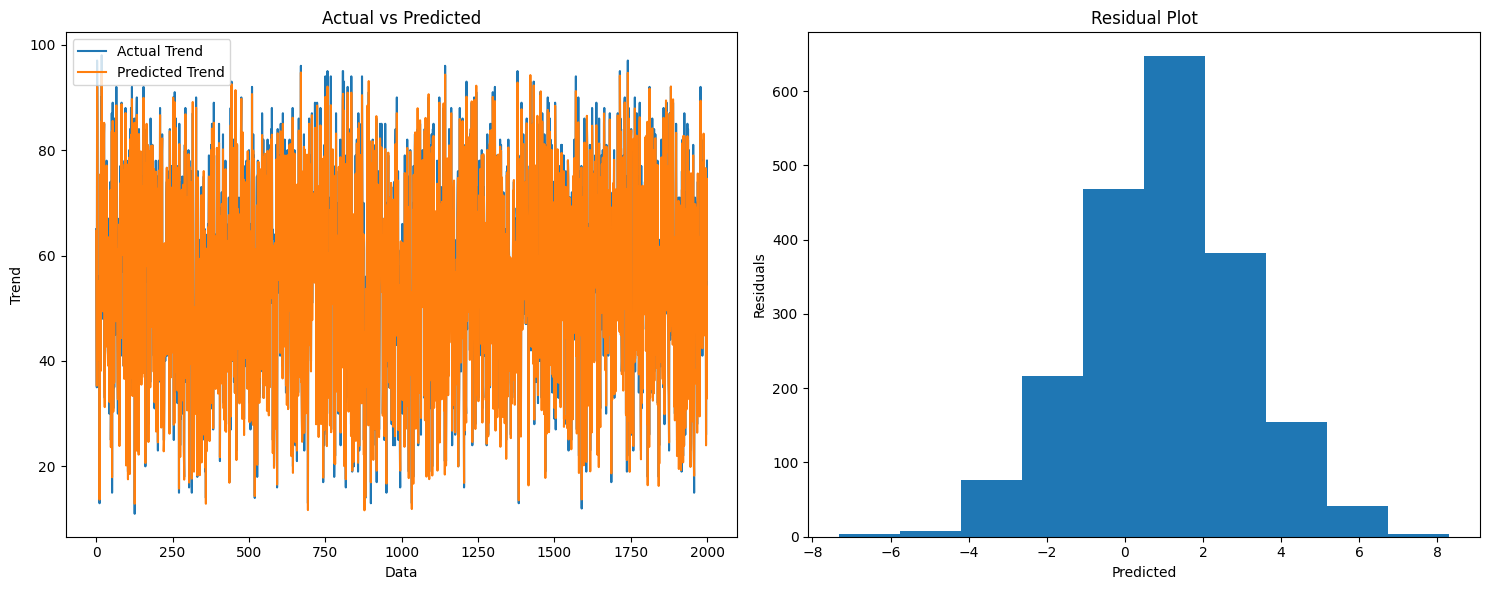

for Extra Trees Regressor : 
Mean Square Error : 6.701724575
Mean Absolute Error : 2.06982
R2 Score : 0.9819177190579598


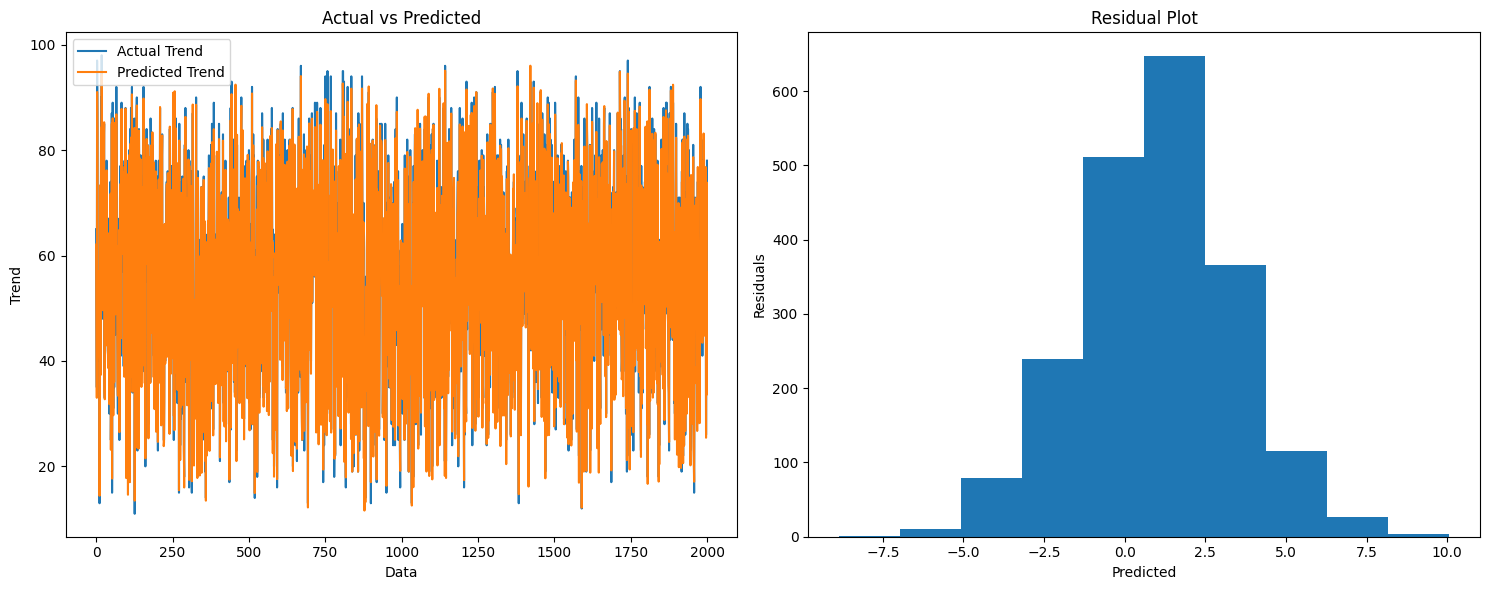

In [ ]:
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    acc[name] = r2
    print(f"for {name} : ")
    print (f"Mean Square Error : {mse}")
    print (f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

    # Plot Residuals
    residuals = Y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.hist(residuals)
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

# Model Building (ANN)

In [ ]:
model = Sequential()

model.add(Dense(units=64, input_dim=6, kernel_initializer="he_normal", activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=64, kernel_initializer="he_normal", activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, validation_split=0.3, epochs=50, batch_size=100)

loss = model.evaluate(X_test, Y_test)
print(f'Validation Loss: {loss}')

Epoch 1/50
56/56 [==============================] - 1s 7ms/step - loss: 1155.1927 - val_loss: 99.6056
Epoch 2/50
56/56 [==============================] - 0s 3ms/step - loss: 488.9040 - val_loss: 146.2400
Epoch 3/50
56/56 [==============================] - 0s 4ms/step - loss: 303.5012 - val_loss: 95.8215
Epoch 4/50
56/56 [==============================] - 0s 3ms/step - loss: 222.1817 - val_loss: 101.9743
Epoch 5/50
56/56 [==============================] - 0s 3ms/step - loss: 192.3743 - val_loss: 133.9937
Epoch 6/50
56/56 [==============================] - 0s 3ms/step - loss: 159.9157 - val_loss: 133.4699
Epoch 7/50
56/56 [==============================] - 0s 3ms/step - loss: 146.5619 - val_loss: 162.0412
Epoch 8/50
56/56 [==============================] - 0s 3ms/step - loss: 130.1050 - val_loss: 203.2753
Epoch 9/50
56/56 [==============================] - 0s 3ms/step - loss: 122.1176 - val_loss: 212.7417
Epoch 10/50
56/56 [==============================] - 0s 3ms/step - loss: 123.1499 -

# Summary of Loss

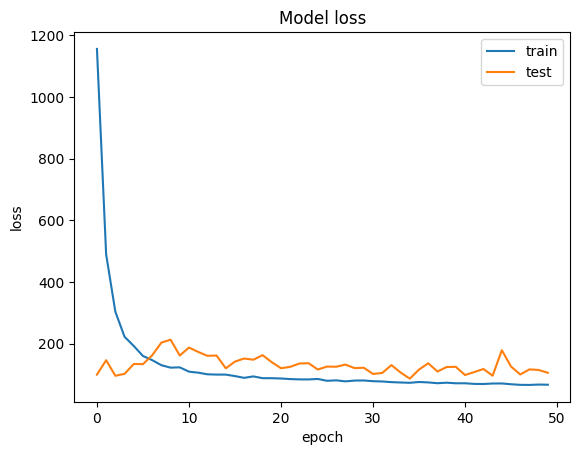

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()